# Geocoding California private schools example

This notebook shows how to use the [python-censusbatchgeocoder](https://github.com/datadesk/python-censusbatchgeocoder) library to map many addresses at once. The example data set is [the state of California's private school roster](http://www.cde.ca.gov/ds/si/ps/), which does not include geographic coordinates.

### Read in the data file

We'll use pandas and its Excel extension to do this.

In [1]:
%%capture
!pip install pandas xlrd

In [2]:
import pandas as pd

In [3]:
df = pd.read_excel("http://www.cde.ca.gov/ds/si/ps/documents/privateschools1617.xls", skiprows=3)

In [4]:
len(df)

2969

In [5]:
df.head(1)

,Affidavit ID,County,CDS Code,School,Street,City,State,Zip,Mailing Street,Mailing City,...,Religious Denomination,Director/Principal Officer Salutation,Director/Principal Officer First Name,Director/Principal Officer Last Name,Director/Principal Officer Title,Director/Principal Officer Email,Custodian of Records Salutation,Custodian of Records First Name,Custodian of Records Last Name,Custodian of Records Email
0,206402,Alameda,01612596910343,Agnes Memorial Christian Academey,2372 International Boulevard,Oakland,CA,94601,NaN,NaN,...,NaN,Ms.,Sandra,phelps,Administrator,NaN,Ms.,Sandra,Phelps,sandybeaches84@yahoo.com


### Install censusbatchgeocoder

In [6]:
%%capture
!pip install censusbatchgeocoder

In [7]:
import censusbatchgeocoder

### Geocode the data

We will set things up here to use ``%time`` so we can see how long it takes to run.

In [8]:
options = dict(
    id="Affidavit ID",
    address="Street",
    city="City",
    state="State",
    zipcode="Zip"
)

In [9]:
%time geocoded_data = censusbatchgeocoder.geocode(df.to_dict("records"), **options)

CPU times: user 740 ms, sys: 104 ms, total: 844 ms
Wall time: 2min 45s


### Convert it back into a dataframe

In [10]:
geocoded_df = pd.DataFrame(geocoded_data)

### Install geopandas

In [11]:
%%capture
!pip install geopandas

In [12]:
import geopandas as gdf

/home/palewire/.virtualenvs/python-censusbatchgeocoder-example/local/lib/python2.7/site-packages/geopandas/__init__.py:1: DeprecationWarning: pandas.util.decorators is deprecated and will be removed in a future version, import from pandas.util


### Convert the data into a geodataframe

In [16]:
import numpy as np
from shapely.geometry import Point

In [17]:
def create_point(row):
    if pd.isnull(row.coordinates):
        return np.NaN
    coords = row.coordinates.split(",")
    coords = map(float, coords)
    return Point(*coords)

In [18]:
geocoded_df['geometry'] = geocoded_df.apply(create_point, axis=1)

In [19]:
gdf = gdf.GeoDataFrame(geocoded_df)

In [20]:
gdf.crs = {'init': u'epsg:4269'}

### Make a simple map

In [21]:
%matplotlib inline

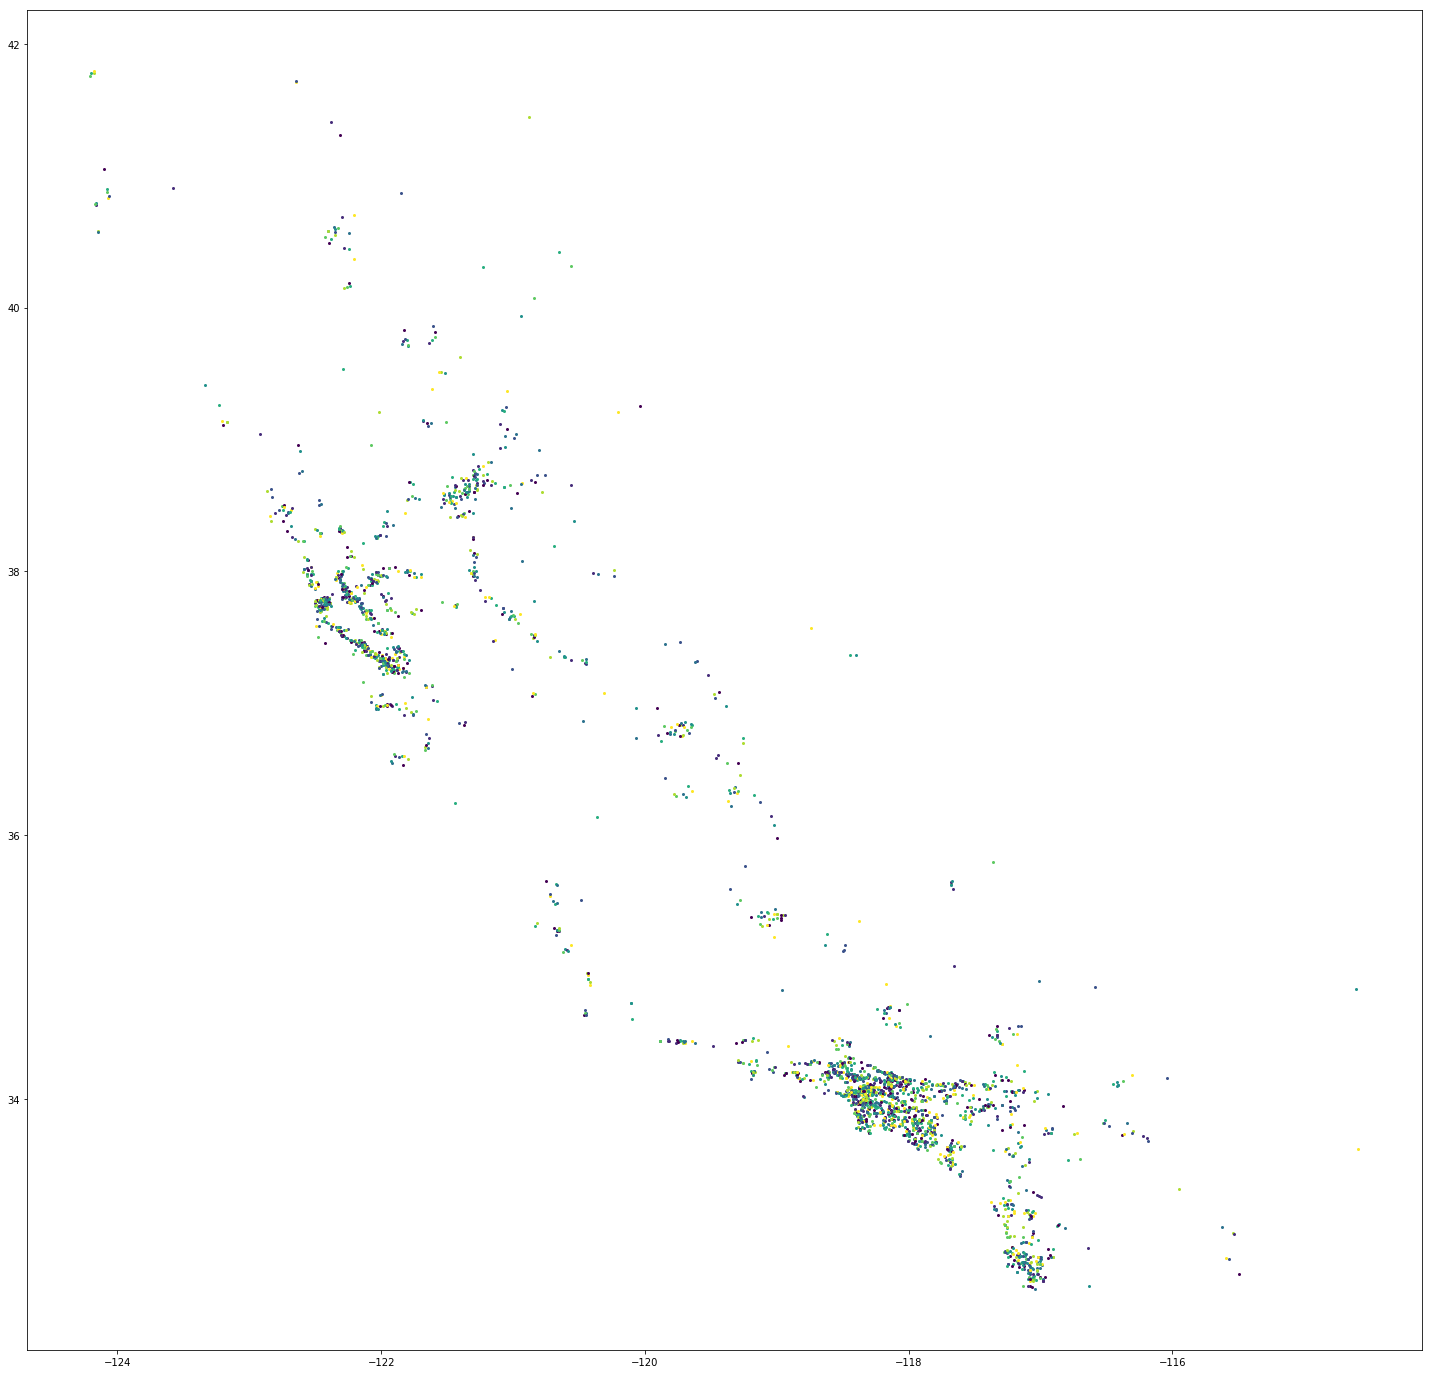

In [24]:
gdf[~gdf.geometry.isnull()].plot(figsize=(25, 40))

### Output what I have installed for auditing

In [26]:
!python --version

Python 2.7.12


In [27]:
!pip freeze

agate==1.6.0
agate-dbf==0.2.0
agate-excel==0.2.1
agate-sql==0.5.2
Babel==2.4.0
backports-abc==0.5
backports.shutil-get-terminal-size==1.0.0
bleach==2.0.0
censusbatchgeocoder==0.0.14
certifi==2017.4.17
chardet==3.0.4
click==6.7
click-plugins==1.0.3
cligj==0.4.0
configparser==3.5.0
csvkit==1.0.2
cycler==0.10.0
dbfread==2.0.7
decorator==4.1.1
descartes==1.1.0
entrypoints==0.2.3
enum34==1.1.6
et-xmlfile==1.0.1
Fiona==1.7.8
functools32==3.2.3.post2
future==0.16.0
geopandas==0.2.1
html5lib==0.999999999
idna==2.5
ipykernel==4.6.1
ipython==5.4.1
ipython-genutils==0.2.0
ipywidgets==6.0.0
isodate==0.5.4
jdcal==1.3
Jinja2==2.9.6
jsonschema==2.6.0
jupyter==1.0.0
jupyter-client==5.1.0
jupyter-console==5.1.0
jupyter-core==4.3.0
leather==0.3.3
MarkupSafe==1.0
matplotlib==2.0.2
mistune==0.7.4
munch==2.1.1
nbconvert==5.2.1
nbformat==4.3.0
notebook==5.0.0
numpy==1.13.1
openpyxl==2.4.8
pandas==0.20.3
pandocfilters==1.4.1
parsedatetime==2.4
pathlib2==2.3.0
pexpect==4.2.1
pickleshare==0.7.4
prompt-toolkit=